In [91]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import scipy.stats 
import statsmodels.api as sm

In [35]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

### Task 4

<AxesSubplot:xlabel='MEDV'>

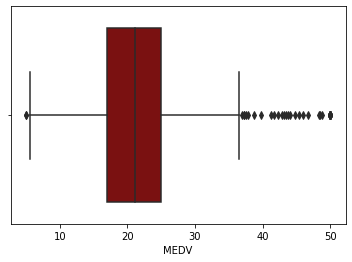

In [36]:
#Question: For the "Median value of owner-occupied homes" provide a boxplot

sns.boxplot(x=boston_df['MEDV'],color='darkred')

<AxesSubplot:>

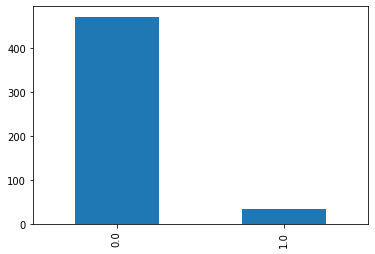

In [86]:
#Question: Provide a  bar plot for the Charles river variable

boston_df['CHAS'].value_counts().plot(kind='bar')
#1 if tract bounds river; 0 otherwise

<AxesSubplot:xlabel='age_group', ylabel='MEDV'>

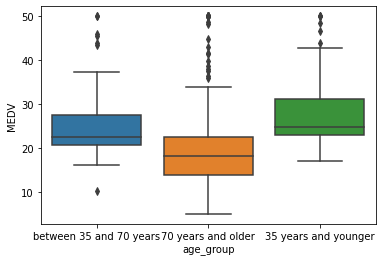

In [42]:
#Question: Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
sns.boxplot(x="age_group", y="MEDV", data=boston_df,)

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

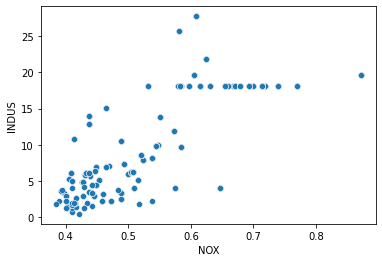

In [46]:
#Question: Provide a scatter plot to show the relationship between Nitric oxide concentrations 
# and the proportion of non-retail business acres per town. What can you say about the relationship?

sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
# The two variables seem to be correlated.The lower the NOX, the lower is the proportion of non-retail business.

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

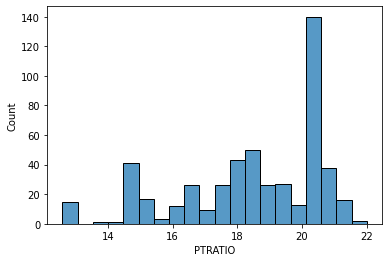

In [84]:
#Question: Create a histogram for the pupil to teacher ratio variable

#sns.catplot(x='PTRATIO', kind='count', data=boston_df,  height = 6, aspect = 3)
sns.histplot(data=boston_df, x="PTRATIO", bins=20)

### Task 5
State your hypothesis. 

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

In [89]:
#Question: Is there a significant difference in median value of houses bounded by the Charles river or not? 
#(T-test for independent samples)

# 𝐻_0:µ_1=µ_2  ("there is no difference in median value of houses bounded by the Charles river")
# 𝐻_1:µ_1≠µ_2  ("there is a difference in median value of houses bounded by the Charles river")

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                     boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)

# Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof 
# that there is a statistical difference in median value of houses bounded by the Charles river

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

In [115]:
#Question: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units
# built prior to 1940 (AGE)? (ANOVA)

# 𝐻_0:µ_1=µ_2  ("there is no difference in median value of houses bounded by occupied units built prior to 1940")
# 𝐻_1:µ_1≠µ_2  ("there is a difference in median value of houses bounded by occupied units built prior to 1940")

age1 = boston_df.loc[boston_df['age_group'] == '35 years and younger']['MEDV']
age2 = boston_df.loc[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
age3 = boston_df.loc[boston_df['age_group'] == '70 years and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(age1,age2,age3)
print('First method: \n', 'F_Statistic: {0}, P-Value: {1}'.format(f_statistic,p_value))

from statsmodels.formula.api import ols
lm = ols('MEDV ~ age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print('\nRegression method: \n',table)

# Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof 
# that there is a statistical difference in median value of houses bounded by occupied units built prior to 1940

First method: 
 F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15

Regression method: 
               df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


In [120]:
#Question: Can we conclude that there is no relationship between Nitric oxide concentrations 
# and proportion of non-retail business acres per town? (Pearson Correlation)

# 𝐻_0: Nitric oxide concentrations are not correlated with the proportion of non-retail business acres per town
# 𝐻_1: Nitric oxide concentrations are not correlated with the proportion of non-retail business acres per town

f_statistic, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print('F_Statistic: {0}, P-Value: {1}'.format(f_statistic,p_value))

# Conclusion: Since the p-value is less than alpha value 0.05, we reject the Null hypothesis and conclude that 
# there exists a relationship between NOX concentrations and the proportion of non-retail business acres per town

F_Statistic: 0.7636514469209157, P-Value: 7.913361061233745e-98


In [123]:
#Question: What is the impact of an additional weighted distance to the five Boston employment centres 
# on the median value of owner occupied homes? (Regression analysis)

# 𝐻_0: µ_1=µ_2  ("the two population means are equal")
# 𝐻_1: µ_1≠µ_2  ("the two population means are different")

from statsmodels.formula.api import ols
lm = ols('DIS ~ MEDV', data = boston_df).fit()
table1= sm.stats.anova_lm(lm)
print(table1)

# Conclusion: Since the p-value is less than alpha value 0.05, we reject the Null hypothesis and conclude that 
# an additional weighted distance to the five Boston employment centres impacts the median value of owner occupied homes

             df       sum_sq     mean_sq         F        PR(>F)
MEDV        1.0   139.868826  139.868826  33.57957  1.206612e-08
Residual  504.0  2099.308819    4.165295       NaN           NaN
